### Muhammad Kevin Alrahmanto (19/445592/PA/19416)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
df=pd.read_excel('data_pet.xlsx')
df.drop(columns=['D'], inplace=True)
df.tail()

,C,V,F,S,ω,L,Q
34,15.0,14.0,2.0,1.000000,0,21,Halus
35,15.0,15.5,2.0,1.000000,0,22,Halus
36,15.0,15.0,30.0,4.000000,0,10,Halus
37,12.0,15.0,0.5,2.333333,0,15,Bermanik
38,20.0,15.0,0.5,2.333333,0,15,Halus


In [3]:
df.iloc[:, -1]=pd.get_dummies(df['Q'])['Halus']
df.tail()

,C,V,F,S,ω,L,Q
34,15.0,14.0,2.0,1.000000,0,21,1
35,15.0,15.5,2.0,1.000000,0,22,1
36,15.0,15.0,30.0,4.000000,0,10,1
37,12.0,15.0,0.5,2.333333,0,15,0
38,20.0,15.0,0.5,2.333333,0,15,1


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [5]:
df_n=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_n.tail()

,C,V,F,S,ω,L,Q
34,0.327354,0.181818,0.065109,0.181818,0.0,0.916667,1.0
35,0.327354,0.250000,0.065109,0.181818,0.0,1.000000,1.0
36,0.327354,0.227273,1.000000,1.000000,0.0,0.000000,1.0
37,0.192825,0.227273,0.015025,0.545455,0.0,0.416667,0.0
38,0.551570,0.227273,0.015025,0.545455,0.0,0.416667,1.0


In [6]:
X= sm.add_constant(df_n.iloc[:, :-1])
Y= df.iloc[:, -1]
model_lr = sm.Logit(Y, X).fit()

Optimization terminated successfully.
         Current function value: 40.615923
         Iterations 8


In [7]:
model_lr.summary()

C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Q   No. Observations:                   39
Model:                          Logit   Df Residuals:                       32
Method:                           MLE   Df Model:                            6
Date:                Thu, 02 Feb 2023   Pseudo R-squ.:                     inf
Time:                        10:35:43   Log-Likelihood:                -1584.0
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9712      2.157     -1.377      0.168      -7.200       1.257
C              3.7704      2.058      1.832      0.067      -0.262       7.803
V             -0.2315      2.081     -0.111      0.911      -4.311       3.848
F              1.0172      3.466      0.293      0.769      -5.776       7.810
S              3.0441      2.030      1.500      0.134      -0.935       7.023
ω             -3.4191      2.553     -1.339      0.181      -8.423       1.585
L              8.7361      4.813      1.815      0.069      -0.697      18.169
==============================================================================
"""

In [8]:
mfx = model_lr.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:                      Q
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
C              0.4732      0.211      2.243      0.025       0.060       0.887
V             -0.0291      0.261     -0.111      0.911      -0.540       0.482
F              0.1277      0.433      0.295      0.768      -0.720       0.976
S              0.3821      0.231      1.656      0.098      -0.070       0.834
ω             -0.4291      0.295     -1.453      0.146      -1.008       0.150
L              1.0965      0.489      2.243      0.025       0.138       2.055


In [9]:
df['prob']=model_lr.predict(X)
df.rename(columns={'Q': 'Halus'})

,C,V,F,S,ω,L,Halus,prob
0,10.0,26.0,12.0000,0.428571,900,12,0,0.087199
1,10.0,26.0,12.0000,1.000000,900,12,0,0.133089
2,10.0,26.0,12.0000,2.333333,900,12,0,0.317138
3,20.0,26.0,12.0000,0.428571,900,12,0,0.341290
4,20.0,26.0,12.0000,1.000000,900,12,0,0.454342
5,20.0,26.0,12.0000,2.333333,900,12,0,0.715819
6,30.0,26.0,12.0000,0.428571,900,12,1,0.737540
7,30.0,26.0,12.0000,1.000000,900,12,1,0.818710
8,30.0,26.0,12.0000,2.333333,900,12,1,0.931795
9,30.0,26.0,4.8000,4.000000,900,12,1,0.977107


In [10]:
df[df['prob']>=0.96]

,C,V,F,S,ω,L,Q,prob
9,30.0,26.0,4.8000,4.000000,900,12,1,0.977107
19,18.0,10.0,0.0526,2.333333,0,15,1,0.983224
20,21.0,10.0,0.0526,2.333333,0,15,1,0.989830
21,24.0,10.0,0.0526,2.333333,0,15,1,0.993851
22,27.0,10.0,0.0526,2.333333,0,15,1,0.996288
23,30.0,10.0,0.0526,2.333333,0,15,1,0.997762
27,22.0,25.0,1.2000,4.000000,300,12,1,0.964944
30,15.0,17.0,1.4000,0.333333,420,20,1,0.991816
31,26.0,20.0,2.0000,1.000000,0,15,1,0.986312
33,12.0,12.0,0.5000,4.000000,500,15,1,0.972867


In [11]:
summary=pd.read_html(model_lr.summary().tables[1].as_html(), header=0, index_col=0)[0]
summary

,coef,std err,z,P>|z|,[0.025,0.975]
const,-2.9712,2.157,-1.377,0.168,-7.200,1.257
C,3.7704,2.058,1.832,0.067,-0.262,7.803
V,-0.2315,2.081,-0.111,0.911,-4.311,3.848
F,1.0172,3.466,0.293,0.769,-5.776,7.810
S,3.0441,2.030,1.500,0.134,-0.935,7.023
ω,-3.4191,2.553,-1.339,0.181,-8.423,1.585
L,8.7361,4.813,1.815,0.069,-0.697,18.169


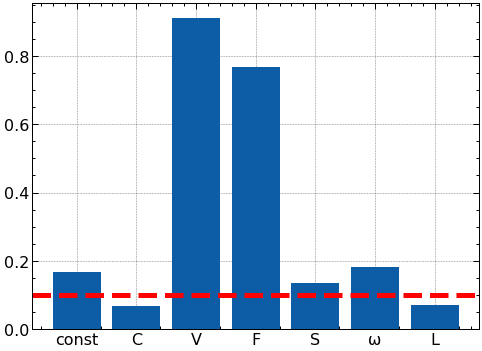

In [12]:
plt.bar(summary.index, height=summary.iloc[:, 3])
plt.axhline(0.1, color='red', ls='--', lw=5)

Beaded electrospun fibers are commonly reported when the concentration of the solution or the molecular weight of the polymer used is too low. They are usually considered as "poor" quality fibers and the electrospinning parameters are often optimized to eliminate beads on fiber (http://electrospintech.com/beads.html#.Y9swuHDP3IU)

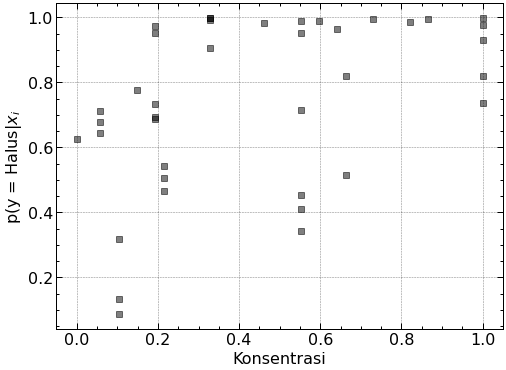

In [31]:
plt.plot(df_n['C'], df['prob'], 'ks', alpha=0.5)
plt.xlabel('Konsentrasi');
plt.ylabel('p(y = Halus|$x_i$');

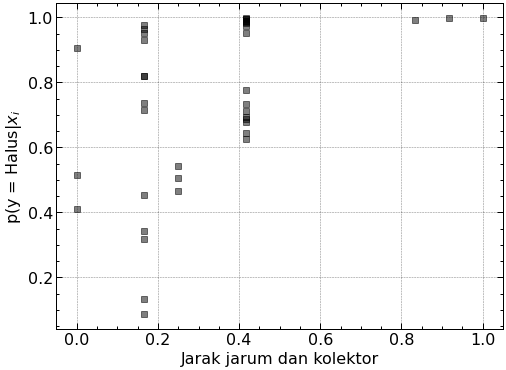

In [29]:
plt.plot(df_n['L '], df['prob'], 'ks', alpha=0.5)
plt.xlabel('Jarak jarum dan kolektor')
plt.ylabel('p(y = Halus|$x_i$');

The results also indicated that declining in collector–injector distance from 8 to 
5 cm increases the strength of electric field, decreases the 
fiber diameter and increases the bead formation
(10.1007/s13738-014-0569-5).